In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def show(img):
    plt.figure(figsize=(7,7))
    plt.imshow(img, cmap='gray')

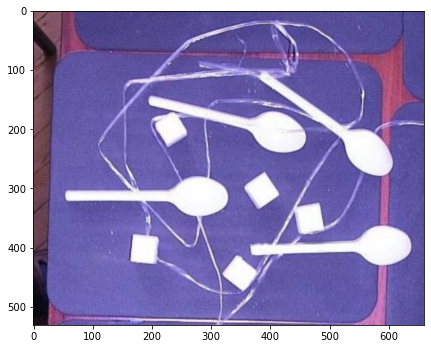

In [61]:
img = cv2.imread('image.png')[:,:,::-1]
show(img)

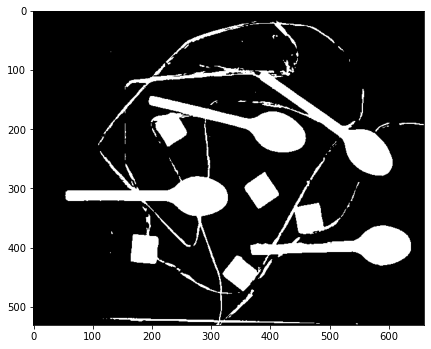

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
show(bin_img)

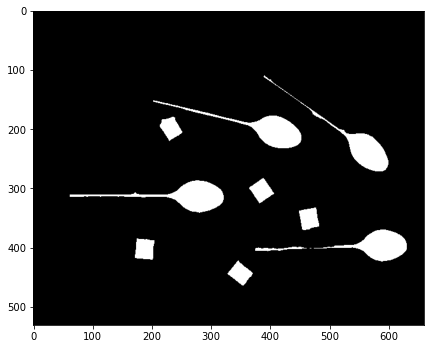

In [68]:
erode=cv2.erode(bin_img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)), iterations=1)
show(erode)

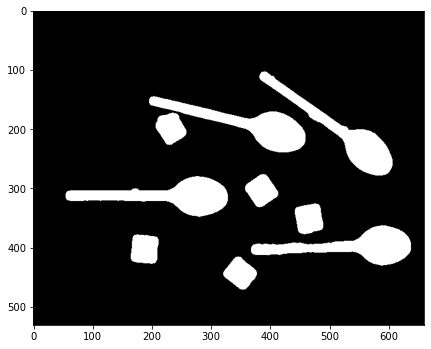

In [69]:
dilate = cv2.dilate(erode, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)), iterations=1)
show(dilate)

In [64]:
contours,_ = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cntrs_area = []
for n in contours:
    area = cv2.contourArea(n)
    cntrs_area.append(area)

index = np.array(cntrs_area).argsort()
sorted_area = sorted(cntrs_area)
print("Отсортированный массив: ",sorted_area)
print("Индексы элементов: ",index)
print("разность элементов массива: ",np.diff(sorted_area))
border_id = np.argmax(np.diff(sorted_area))+1
border_val = sorted_area[border_id]
print("Индекс максимального значения: ",border_id)

Отсортированный массив:  [1859.5, 1899.5, 1916.0, 1922.5, 1945.0, 7366.5, 7488.5, 7588.5, 7898.0]
Индексы элементов:  [6 0 3 5 1 8 2 7 4]
разность элементов массива:  [  40.    16.5    6.5   22.5 5421.5  122.   100.   309.5]
Индекс максимального значения:  5


In [65]:
spoons = index[border_id:]
sugar = index[:border_id]

Всего элементов:  9  | Ложек:  4  | Сахар:  5 


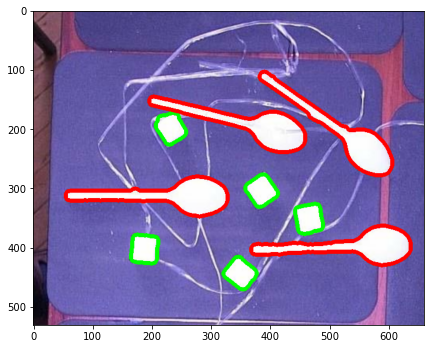

In [66]:
res = img.copy()
print("Всего элементов: ",len(indices), " | Ложек: ",len(spoons)," | Сахар: ",len(sugar),"")

for i in index:
    if i in spoons:
        cv2.drawContours(res, contours, i, (255,0,0), 5)
    else:
        cv2.drawContours(res, contours, i, (0,255,0), 5)
show(res)